# Read me

This code will clean and explore the following demographic features from full_dataset.csv
1. Race
2. Gender
3. Service Branch
4. Last Service Rank

In [1]:
import numpy as np
import pandas as pd

In [2]:
full_dataset = pd.read_csv('full_dataset.csv', encoding='latin', low_memory=False)
print("Id_x Column Facts:")
print("Unique Values:", full_dataset['Id_x'].nunique())
print("Null Values:", full_dataset['Id_x'].isna().sum())
#dtypeCount =[full_dataset.iloc[:,i].apply(type).value_counts() for i in range(full_dataset.shape[1])]
#dtypeCount[0]
full_dataset.shape

Id_x Column Facts:
Unique Values: 30540
Null Values: 0


(30754, 425)

In [3]:
full_dataset.head()

,Id_x,AccountId,RecordTypeId,MailingState,MailingPostalCode,MailingCountry,LeadSource,OwnerId,HasOptedOutOfEmail,HasOptedOutOfFax,...,X7_Day_Review__c,Months_Unemployed__c_y,Revised_Resume_Used_to_Apply_for_Job__c_y,Hired_but_still_active_and_looking__c_y,Date_Submitted_For_Hire__c,Hire_Confirmed_By__c,Area_Manager_Approved__c,PIM_Approved__c,Ops_Review_Date__c,Multiple_Hire__c
0,0030z00002PrWi1AAF,0015000000KUwKAAA1,01238000000UVfW,ID,83815,United States,NaN,00538000005F2ADAA0,0,0,...,NaN,NaN,1,0,10/22/2018 0:00,00538000005F2ADAA0,1,1,10/29/2018 0:00,0.0
1,0030z00002PrWn1AAF,0015000000KUwKAAA1,01238000000UVfW,CA,92103,United States,NaN,005380000063Mf7AAE,0,0,...,NaN,NaN,1,0,10/8/2018 0:00,005380000063Mf7AAE,1,1,10/15/2018 0:00,0.0
2,0030z00002PrXLpAAN,0015000000KUwKAAA1,01238000000UVfW,GA,31324,United States,NaN,00538000004sKV8AAM,0,0,...,0.0,1.0,1,0,11/28/2018 0:00,00538000004sKV8AAM,1,1,12/3/2018 0:00,0.0
3,0030z00002PrXU9AAN,0015000000KUwKAAA1,01238000000UVfW,TX,77006,United States,NaN,005380000063MfvAAE,0,0,...,0.0,NaN,0,0,12/14/2018 0:00,005380000063MfvAAE,1,1,12/17/2018 0:00,0.0
4,0030z00002PrXpMAAV,0015000000KUwKAAA1,01238000000UVfW,TX,77450,United States,NaN,00538000004wgQWAAY,0,0,...,NaN,1.0,0,0,9/14/2018 0:00,00538000004wgQWAAY,1,1,9/17/2018 0:00,0.0


In [4]:
# The demographic features that we will clean and explore
demographic_features = ['Id_x', 'Race__c', 'Gender__c', 'Service_Branch__c', 'Service_Rank__c']
demo_full_dataset = full_dataset[demographic_features]
demo_full_dataset.head()

,Id_x,Race__c,Gender__c,Service_Branch__c,Service_Rank__c
0,0030z00002PrWi1AAF,White,Male,Army,E-3
1,0030z00002PrWn1AAF,White,Male,Marines,E-6
2,0030z00002PrXLpAAN,Hispanic or Latino,Male,Army,E-9
3,0030z00002PrXU9AAN,White,Female,Marines,E-4
4,0030z00002PrXpMAAV,Black or African American,Female,Air Force,E-7


## <font color=red>The number and % of missing values for each features</font>

In [26]:
total_records = len(demo_full_dataset.index)
print("Total number of records: ", total_records)
values_count = demo_full_dataset.count()
missing_values_count = demo_full_dataset.isna().sum()
missing_values_table = values_count.to_frame('# Values')
missing_values_table['# Missing values'] = missing_values_count
proportion = np.divide(missing_values_count, total_records/100)
missing_values_table['% Missing values'] = proportion
missing_values_table = missing_values_table.reset_index()
missing_values_table

Total number of records:  30754


,index,# Values,# Missing values,% Missing values
0,Id_x,30754,0,0.000000
1,Race__c,5226,25528,83.007089
2,Gender__c,28038,2716,8.831372
3,Service_Branch__c,29066,1688,5.488717
4,Service_Rank__c,29008,1746,5.677310


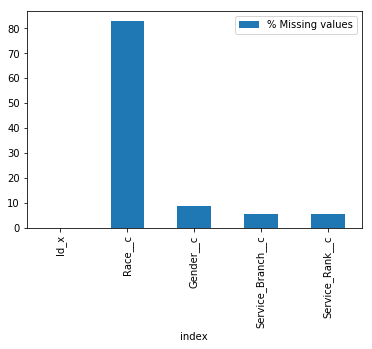

In [27]:
missing_values_table.plot(x = 'index', y = '% Missing values', kind = 'bar')

## <font color=green>1. Race:</font>

### 83% of the data is null!
### Should we use Race Feature in our analysis? If yes, how to clean the data?

## <font color=green>2. Gender:</font>

### The majority is Male Group with 79%

In [7]:
demo_full_dataset.groupby('Gender__c').describe()

Id_x                                 Race__c                      \
           count unique                 top freq   count unique    top  freq   
Gender__c                                                                      
Female      5676   5632  0035000001nMk2bAAC    3    1181      8  White   484   
Male       22362  22200  0035000002PTiTOAA1    3    4041      7  White  2324   

          Service_Branch__c                     Service_Rank__c              \
                      count unique   top   freq           count unique  top   
Gender__c                                                                     
Female                 4260      6  Army   2308            4235     20  E-5   
Male                  22220      5  Army  12087           22190     25  E-5   

                 
           freq  
Gender__c        
Female     1051  
Male       4475

In [8]:
demo_full_dataset_by_feature = demo_full_dataset.groupby('Gender__c')
countTable = demo_full_dataset_by_feature['Id_x'].agg(['count'])
total_feature = countTable.values.sum()
print("Total number of Gender records: ", total_feature)
proportion = np.divide(countTable['count'], total_feature/100)
countTable['%'] = proportion
countTable = countTable.reset_index()
countTable

Total number of Gender records:  28038


,Gender__c,count,%
0,Female,5676,20.243955
1,Male,22362,79.756045


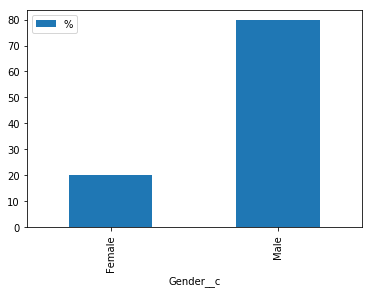

In [9]:
countTable.plot(x = 'Gender__c', y = '%', kind = 'bar')

### Clean the data by droping all the rows with missing values in Gender

In [10]:
clean_full_dataset = full_dataset.dropna(subset = ['Gender__c'])
total_records = len(clean_full_dataset.index)
print("Total number of records: ", total_records)

Total number of records:  28038


## <font color=green>3. Service Branch:</font>
### 54% of the clients are from Army

In [11]:
demo_full_dataset.groupby('Service_Branch__c').describe()

Id_x                                 Race__c         \
                   count unique                 top freq   count unique   
Service_Branch__c                                                         
Air Force           4287   4258  0035000001nMk2bAAC    3     846      7   
Army               15772  15678  0033800002UlOQ0AAN    2    2407      7   
Coast Guard          252    250  0033800002exN79AAE    2      56      5   
Marines             4022   3988  0033800002kCJj9AAG    3     592      7   
Navy                4731   4686  0033800002Y3kIWAAZ    2     920      7   
Not Applicable         2      2  0033800002lzstrAAA    1       1      1   

                               Gender__c                        \
                     top  freq     count unique     top   freq   
Service_Branch__c                                                
Air Force          White   520      3911      2    Male   3076   
Army               White  1212     14395      2    Male  12087   
Coast Guard        White    41       231      2    Male    206   
Marines            White   349      3623      2    Male   3315   
Navy               White   485      4318      2    Male   3536   
Not Applicable     White     1         2      1  Female      2   

                  Service_Rank__c                    
                            count unique  top  freq  
Service_Branch__c                                    
Air Force                    4271     16  E-7   966  
Army                        15709     25  E-4  3397  
Coast Guard                   252     17  E-5    52  
Marines                      4001     21  E-5  1129  
Navy                         4711     20  E-5  1086  
Not Applicable                  0      0  NaN   NaN

In [12]:
demo_full_dataset_by_feature = demo_full_dataset.groupby('Service_Branch__c')
countTable = demo_full_dataset_by_feature['Id_x'].agg(['count'])
total_feature = countTable.values.sum()
print("Total number of Service Branch records: ", total_feature)
proportion = np.divide(countTable['count'], total_feature/100)
countTable['%'] = proportion
countTable = countTable.reset_index()
countTable

Total number of Service Branch records:  29066


,Service_Branch__c,count,%
0,Air Force,4287,14.749191
1,Army,15772,54.262712
2,Coast Guard,252,0.866992
3,Marines,4022,13.837473
4,Navy,4731,16.276749
5,Not Applicable,2,0.006881


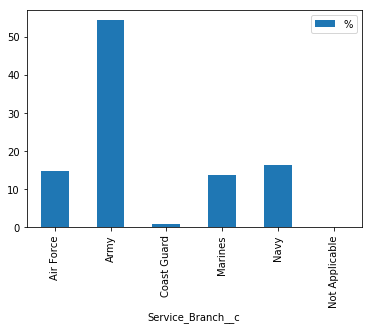

In [13]:
countTable.plot(x = 'Service_Branch__c', y = '%', kind = 'bar')

### Clean the data by droping all the rows with missing values in Service Branch

In [14]:
clean_full_dataset = clean_full_dataset.dropna(subset = ['Service_Branch__c'])
total_records = len(clean_full_dataset.index)
print("Total number of records: ", total_records)

Total number of records:  26480


## <font color=green>4. Last Service Rank:</font>
### 83% of the clients are ranked E

In [15]:
demo_full_dataset.groupby('Service_Rank__c').describe()

Id_x                                 Race__c         \
                count unique                 top freq   count unique   
Service_Rank__c                                                        
CW-2                1      1  0033800002h23l7AAA    1       0      0   
CW-3                1      1  0030z00002SN8QhAAL    1       1      1   
CW-4                2      2  0033800002n7cv4AAA    1       0      0   
E-1               107    107  0033800002kCjyqAAC    1       4      4   
E-2               208    204  0035000001nMk2bAAC    3      22      4   
E-3              1010   1002  0035000001vMoUPAA0    2     124      7   
E-4              5814   5776  00350000029y0HzAAI    3     840      7   
E-5              6139   6078  0033800002sJGvbAAG    2     942      7   
E-6              4279   4242  0035000002PTiTOAA1    3     662      7   
E-7              4170   4151  0033800002eyAAzAAM    2     803      7   
E-8              1844   1833  00350000029xUH6AAM    2     378      6   
E-9               680    678  0035000002TL7mtAAD    2     136      6   
O-1               116    114  0035000002A0Sm2AAF    2      10      3   
O-10                1      1  0035000000l9fPhAAI    1       0      0   
O-2               462    459  0035000002JBu0IAAT    2      79      6   
O-3              1667   1655  0035000002DxxA1AAJ    2     326      7   
O-4               809    807  003500000246ATOAA2    2     136      6   
O-5               743    740  0033800002kCJj9AAG    3     141      6   
O-6               274    274  0033800002g5ezAAAQ    1      55      6   
O-7                 2      2  0033800002Y3QqNAAV    1       0      0   
O-8                 2      2  0033800002aGZ7dAAG    1       0      0   
W-1                18     18  0033800002g3MHQAA2    1       4      2   
W-2               183    182  0033800002UHgooAAD    2      36      6   
W-3               252    251  0033800002UFq7pAAD    2      55      6   
W-4               190    190  0035000001tg4HlAAI    1      36      5   
W-5                34     34  0033800002qrJqzAAE    1       7      4   

                                                Gender__c                     \
                                       top freq     count unique   top  freq   
Service_Rank__c                                                                
CW-2                                   NaN  NaN         1      1  Male     1   
CW-3                                 White    1         1      1  Male     1   
CW-4                                   NaN  NaN         2      2  Male     1   
E-1              Black or African American    1        89      2  Male    67   
E-2                                  White   13       187      2  Male   140   
E-3                                  White   55       899      2  Male   711   
E-4                                  White  387      5194      2  Male  4180   
E-5                                  White  439      5526      2  Male  4475   
E-6                                  White  368      3915      2  Male  3335   
E-7                                  White  438      3835      2  Male  3362   
E-8                                  White  197      1735      2  Male  1515   
E-9                                  White   76       633      2  Male   581   
O-1                                  White    5       103      2  Male    87   
O-10                                   NaN  NaN         0      0   NaN   NaN   
O-2                                  White   48       425      2  Male   355   
O-3                                  White  241      1547      2  Male  1283   
O-4                                  White   98       765      2  Male   649   
O-5                                  White  105       680      2  Male   633   
O-6                                  White   41       264      2  Male   245   
O-7                                    NaN  NaN         2      1  Male     2   
O-8                                    NaN  NaN         2      1  Male     2   
W-1     

In [16]:
demo_full_dataset_by_feature = demo_full_dataset.groupby('Service_Rank__c')
countTable = demo_full_dataset_by_feature['Id_x'].agg(['count'])
total_feature = countTable.values.sum()
print("Total number of Service Rank records: ", total_feature)
proportion = np.divide(countTable['count'], total_feature/100)
countTable['%'] = proportion
countTable = countTable.reset_index()
countTable

Total number of Service Rank records:  29008


,Service_Rank__c,count,%
0,CW-2,1,0.003447
1,CW-3,1,0.003447
2,CW-4,2,0.006895
3,E-1,107,0.368864
4,E-2,208,0.717044
5,E-3,1010,3.481798
6,E-4,5814,20.042747
7,E-5,6139,21.163127
8,E-6,4279,14.751103
9,E-7,4170,14.375345


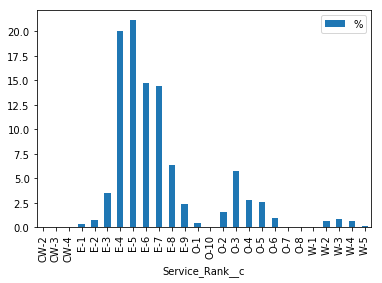

In [17]:
countTable.plot(x = 'Service_Rank__c', y = '%', kind = 'bar')

### Clean the data by droping all the rows with missing values in Last Service Rank

In [18]:
clean_full_dataset = clean_full_dataset.dropna(subset = ['Service_Rank__c'])
total_records = len(clean_full_dataset.index)
print("Total number of records: ", total_records)

Total number of records:  26365


### Adding Main Service Rank Column accourding to:
1. Enlisted Personnel (E)
2. Warrant Officers (W, CW)
3. Commissioned Officers (O)

source: https://www.infoplease.com/us/military-personnel/us-military-ranks

In [19]:
E_query = clean_full_dataset[clean_full_dataset['Service_Rank__c'].str.startswith('E', na=False)]
#print(len(E_query.index))
W_CW_query = clean_full_dataset[(clean_full_dataset['Service_Rank__c'].str.startswith('W', na=False)
                                 | clean_full_dataset['Service_Rank__c'].str.startswith('CW', na=False))]
#print(len(W_CW_query.index))
O_query = clean_full_dataset[clean_full_dataset['Service_Rank__c'].str.startswith('O', na=False)]
#print(len(O_query.index))
clean_full_dataset = clean_full_dataset.assign(Main_Service_Rank = 
                                np.where(clean_full_dataset['Service_Rank__c'].str.startswith('E', na=False), 'E',
                                         np.where((clean_full_dataset['Service_Rank__c'].str.startswith('W', na=False)
                                 | clean_full_dataset['Service_Rank__c'].str.startswith('CW', na=False)), 'W',
                                                  np.where(clean_full_dataset['Service_Rank__c'].str.startswith('O', na=False), 'O', 'NaN'))))
clean_full_dataset.groupby('Main_Service_Rank').describe()

HasOptedOutOfEmail                                          \
                               count      mean       std  min  25%  50%  75%   
Main_Service_Rank                                                              
E                            21967.0  0.046297  0.210132  0.0  0.0  0.0  0.0   
O                             3775.0  0.063841  0.244502  0.0  0.0  0.0  0.0   
W                              623.0  0.044944  0.207347  0.0  0.0  0.0  0.0   

                       HasOptedOutOfFax       ... PIM_Approved__c       \
                   max            count mean  ...             75%  max   
Main_Service_Rank                             ...                        
E                  1.0          21967.0  0.0  ...             1.0  1.0   
O                  1.0           3775.0  0.0  ...             1.0  1.0   
W                  1.0            623.0  0.0  ...             1.0  1.0   

                  Multiple_Hire__c                                          \
                             count      mean       std  min  25%  50%  75%   
Main_Service_Rank                                                            
E                           4373.0  0.035902  0.186067  0.0  0.0  0.0  0.0   
O                            784.0  0.025510  0.157769  0.0  0.0  0.0  0.0   
W                            109.0  0.009174  0.095783  0.0  0.0  0.0  0.0   

                        
                   max  
Main_Service_Rank       
E                  1.0  
O                  1.0  
W                  1.0  

[3 rows x 1448 columns]

In [20]:
clean_full_dataset_by_feature = clean_full_dataset.groupby('Main_Service_Rank')
countTable = clean_full_dataset_by_feature['Id_x'].agg(['count'])
total_feature = countTable.values.sum()
print("Total number of Main Service Rank records: ", total_feature)
proportion = np.divide(countTable['count'], total_feature/100)
countTable['%'] = proportion
countTable = countTable.reset_index()
countTable

Total number of Main Service Rank records:  26365


,Main_Service_Rank,count,%
0,E,21967,83.318794
1,O,3775,14.318225
2,W,623,2.362981


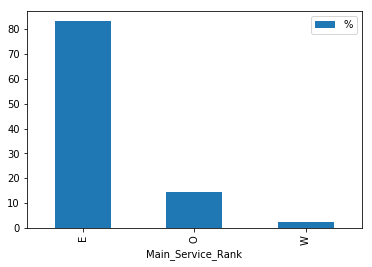

In [21]:
countTable.plot(x = 'Main_Service_Rank', y = '%', kind = 'bar')

## <font color=red>The number and % of missing values for each features</font>

In [22]:
total_records = len(clean_full_dataset.index)
print("Total number of records: ", total_records)
values_count = clean_full_dataset[demographic_features].count()
missing_values_count = clean_full_dataset[demographic_features].isna().sum()
missing_values_table = values_count.to_frame('# Values')
missing_values_table['# Missing values'] = missing_values_count
proportion = np.divide(missing_values_count, total_records/100)
missing_values_table['% Missing values'] = proportion
missing_values_table = missing_values_table.reset_index()
missing_values_table

Total number of records:  26365


,index,# Values,# Missing values,% Missing values
0,Id_x,26365,0,0.000000
1,Race__c,4780,21585,81.869903
2,Gender__c,26365,0,0.000000
3,Service_Branch__c,26365,0,0.000000
4,Service_Rank__c,26365,0,0.000000


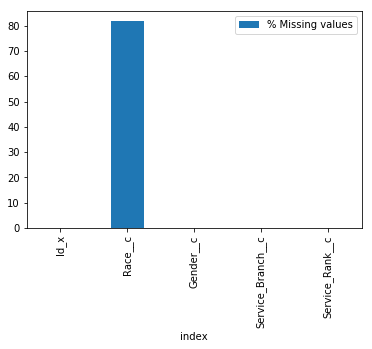

In [23]:
missing_values_table.plot(x ='index', y='% Missing values', kind = 'bar')

In [24]:
clean_full_dataset.head()

,Id_x,AccountId,RecordTypeId,MailingState,MailingPostalCode,MailingCountry,LeadSource,OwnerId,HasOptedOutOfEmail,HasOptedOutOfFax,...,Months_Unemployed__c_y,Revised_Resume_Used_to_Apply_for_Job__c_y,Hired_but_still_active_and_looking__c_y,Date_Submitted_For_Hire__c,Hire_Confirmed_By__c,Area_Manager_Approved__c,PIM_Approved__c,Ops_Review_Date__c,Multiple_Hire__c,Main_Service_Rank
0,0030z00002PrWi1AAF,0015000000KUwKAAA1,01238000000UVfW,ID,83815,United States,NaN,00538000005F2ADAA0,0,0,...,NaN,1,0,10/22/2018 0:00,00538000005F2ADAA0,1,1,10/29/2018 0:00,0.0,E
1,0030z00002PrWn1AAF,0015000000KUwKAAA1,01238000000UVfW,CA,92103,United States,NaN,005380000063Mf7AAE,0,0,...,NaN,1,0,10/8/2018 0:00,005380000063Mf7AAE,1,1,10/15/2018 0:00,0.0,E
2,0030z00002PrXLpAAN,0015000000KUwKAAA1,01238000000UVfW,GA,31324,United States,NaN,00538000004sKV8AAM,0,0,...,1.0,1,0,11/28/2018 0:00,00538000004sKV8AAM,1,1,12/3/2018 0:00,0.0,E
3,0030z00002PrXU9AAN,0015000000KUwKAAA1,01238000000UVfW,TX,77006,United States,NaN,005380000063MfvAAE,0,0,...,NaN,0,0,12/14/2018 0:00,005380000063MfvAAE,1,1,12/17/2018 0:00,0.0,E
4,0030z00002PrXpMAAV,0015000000KUwKAAA1,01238000000UVfW,TX,77450,United States,NaN,00538000004wgQWAAY,0,0,...,1.0,0,0,9/14/2018 0:00,00538000004wgQWAAY,1,1,9/17/2018 0:00,0.0,E


## Save the clean_full_dataset to <font color=blue>csv full_dataset_1.1.csv</font>

In [25]:
full_dataset.to_csv("full_dataset_1.1.csv", index=False)